<a href="https://colab.research.google.com/github/njlym/Data-Science-and-Machine-learning-Bootcamp/blob/main/Popular_Baby_Names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset called Popular Baby Names.

The source: (https://catalog.data.gov/dataset/popular-baby-names )


# Data cleaning

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Create a Pandas DataFrame from the CSV file
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1EFyV-2DbSsxz-Ck2rhdVQ1DDSFkPJjc5')

# Display the first few rows of the DataFrame
print("First few rows of the Popular Baby Names dataset:")
df.head()



First few rows of the Popular Baby Names dataset:


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [ ]:
# get the column
df.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

In [ ]:
#rename columns
df.rename(columns={'Year of Birth':'Year'}, inplace=True)

In [ ]:
#check how many missing values
df.isnull().sum()


Year                  0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49509 entries, 0 to 49508
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                49509 non-null  int64 
 1   Gender              49509 non-null  object
 2   Ethnicity           49509 non-null  object
 3   Child's First Name  49509 non-null  object
 4   Count               49509 non-null  int64 
 5   Rank                49509 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [ ]:
#check the Rank column values
Rank= df['Rank'].unique()
Rank

array([ 75,  67,  42,  51,  53,  62,   8,  74,  71,  78,  73,  72,  77,
        60,   1,  70,  61,  65,  58,  41,  76,  68,  48,  55,  40,  66,
        64,  34,  44,  57,  63,  33,  31,  20,  69,  35,  13,  52,  59,
        39,   9,  27,  10,  56,  12,   2,  25,  18,  14,  38,  28,   6,
         3,  19,  45,  47,  11,  79,  17,  43,  80,  37,  81,  46,   5,
        22,  50,  21,  30,  24,  54,  15,  36,  23,   7,  16,  49,  29,
         4,  32,  26,  92,  90,  82,  91,  88,  89,  94,  83,  93,  84,
        87,  85,  86,  96,  97,  95,  99,  98, 100, 101, 102])

In [ ]:
#replace the white spaces
df.Gender = df.Gender.str.replace('Y ', 'Y')
df.Gender = df.Gender.str.replace('N ', 'N')

In [ ]:
df_2 = df['Rank']>50

In [ ]:
df_2.describe()

count     49509
unique        2
top        True
freq      29345
Name: Rank, dtype: object

In [ ]:
# check for duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49504    False
49505    False
49506    False
49507    False
49508    False
Length: 49509, dtype: bool

In [ ]:
#remove duplication

df = df.drop_duplicates()

# Data procsseing

In [ ]:
del df['Ethnicity']

In [ ]:
df.head()

,Year,Gender,Child's First Name,Count,Rank
0,2011,FEMALE,GERALDINE,13,75
1,2011,FEMALE,GIA,21,67
2,2011,FEMALE,GIANNA,49,42
3,2011,FEMALE,GISELLE,38,51
4,2011,FEMALE,GRACE,36,53


In [ ]:
# Replace 'FAMALE' with F and 'MALE' with M in the 'Gender' column
df['Gender'] = df['Gender'].replace({'FEMALE' : 'F' , 'MALE' :'M' })

In [ ]:
df.head()

,Year,Gender,Child's First Name,Count,Rank,First Letter
0,2011,F,GERALDINE,13,75,G
1,2011,F,GIA,21,67,G
2,2011,F,GIANNA,49,42,G
3,2011,F,GISELLE,38,51,G
4,2011,F,GRACE,36,53,G


# Data Visualization

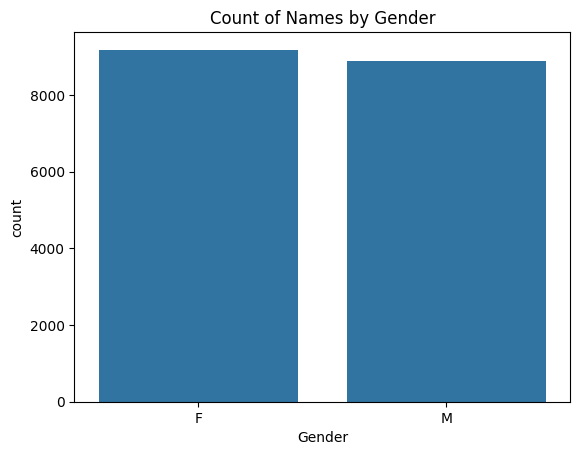

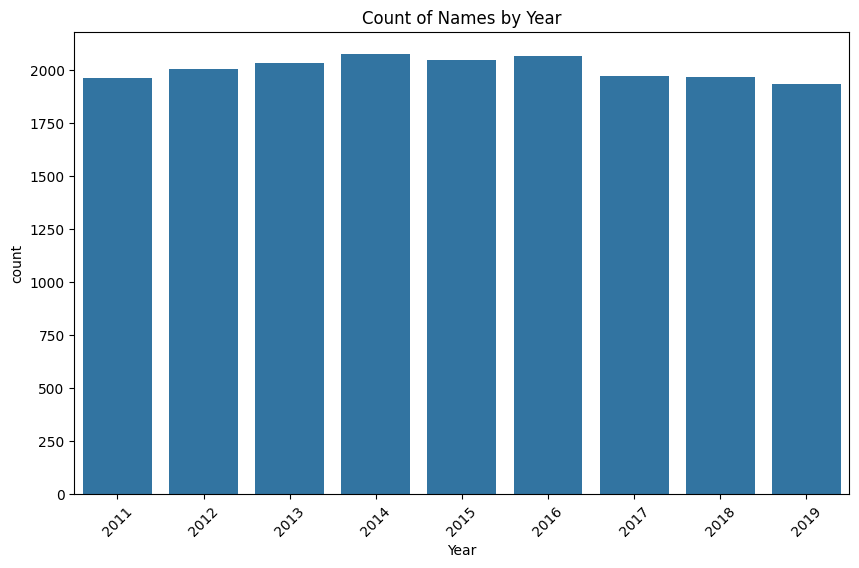

In [ ]:
import matplotlib.pyplot as plt
# Plot the count of names by gender
sns.countplot(data=df, x='Gender')
plt.title('Count of Names by Gender')
plt.show()

# Plot the count of names by year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year')
plt.title('Count of Names by Year')
plt.xticks(rotation=45)
plt.show()


<ipython-input-97-4f9beefad9d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_names.values, y=top_10_names.index, palette='viridis')


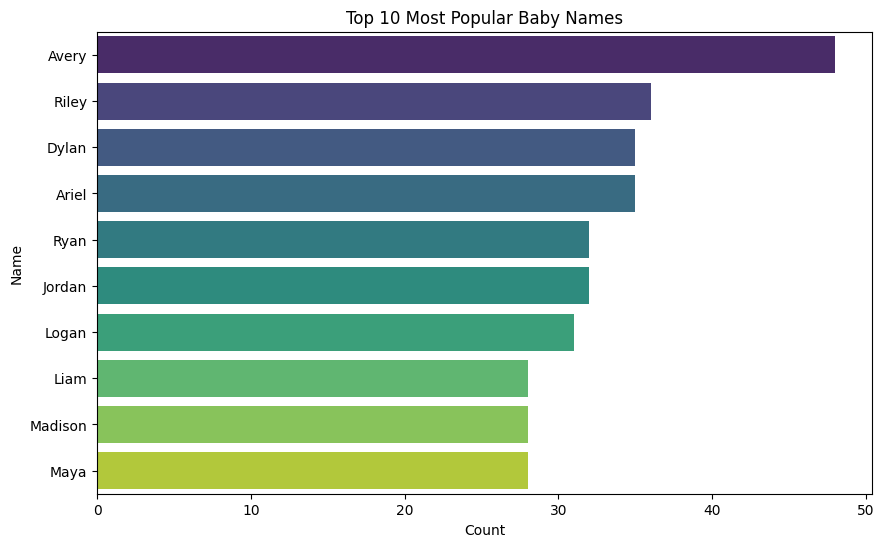

In [ ]:
# Get the top 10 most popular names
top_10_names = df['Child\'s First Name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_names.values, y=top_10_names.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 10 Most Popular Baby Names')
plt.show()


<ipython-input-98-2fdb635f6712>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='First Letter', discrete=True, multiple='stack', palette='muted')


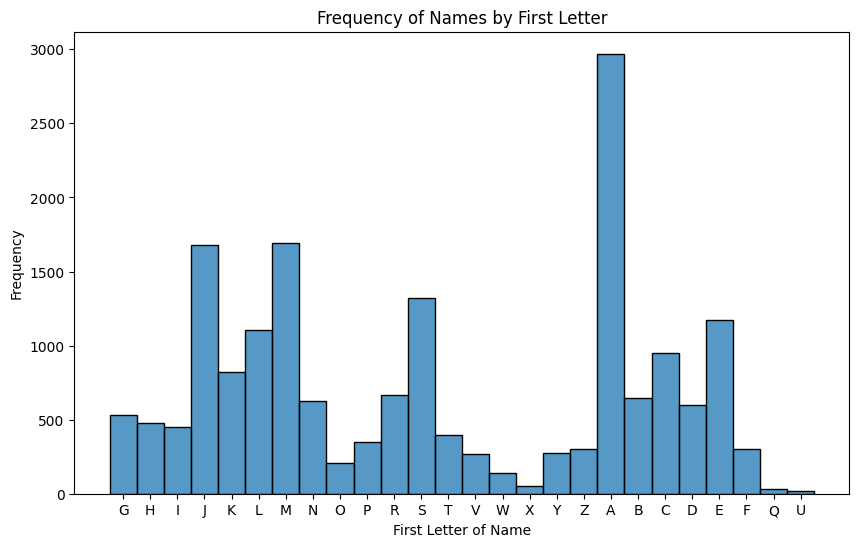

In [ ]:
# Extract the first letter of each name
df['First Letter'] = df['Child\'s First Name'].str[0]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='First Letter', discrete=True, multiple='stack', palette='muted')
plt.xlabel('First Letter of Name')
plt.ylabel('Frequency')
plt.title('Frequency of Names by First Letter')
plt.show()
